In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import import_ipynb
import seaborn as sns
from functools import reduce

In [2]:
#As always we have to specify to jupyter that we want to see all the outputs.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
pd.options.display.max_rows = 1000
pd.options.display.max_columns= 1000

In [3]:
%%capture

#the %%capture makes sure not the whole of last assignment is printed here

#import Dataframes as df


#This imports dataframes from other code.
%run "Dataframes.ipynb"


In [4]:
#framedict = df.framedict
framedict.keys()

dict_keys(['Deaths', 'Vaccination', 'Demographics', 'Age', 'Hospitals', 'Names'])

In [5]:
hosp_frame = framedict['Hospitals']


Index(['pc11_state_id', 'censuscode', 'dlhs4_dh_beds', 'dlhs4_dh_count',
       'dlhs4_dh_staff', 'dlhs4_dh_icu_beds', 'dlhs4_chc_beds',
       'dlhs4_chc_count', 'dlhs4_chc_staff', 'dlhs4_chc_beds_ven',
       'dlhs4_phc_beds', 'dlhs4_phc_count', 'dlhs4_phc_staff', 'dlhs4_phc_pop',
       'dlhs4_phc_beds_oxy', 'pc11_pca_tot_p', 'dlhs4_phc_mult',
       'dlhs4_total_beds', 'dlhs4_total_staff', 'dlhs4_total_facilities'],
      dtype='object')

In [6]:
india_shp_MASTERS = './maps-master/maps-master/Districts/Census_2011/2011_Dist.shp'

In [7]:
india_s_masters = gpd.read_file(india_shp_MASTERS)
india_s_masters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   DISTRICT    641 non-null    object  
 1   ST_NM       641 non-null    object  
 2   ST_CEN_CD   641 non-null    int64   
 3   DT_CEN_CD   641 non-null    int64   
 4   censuscode  641 non-null    int64   
 5   geometry    641 non-null    geometry
dtypes: geometry(1), int64(3), object(2)
memory usage: 30.2+ KB


In [21]:
india_s_masters.head()

missingcheck(india_s_masters['censuscode'],641 )

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945..."
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278..."
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23..."
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509..."
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236..."


0 values are missing.


[]

In [9]:
# We can merge the dataframes on the censuscodes. 
# These codes represent the numbers that were given to the districts
type(india_s_masters["censuscode"])
type(hosp_frame["censuscode"])

pandas.core.series.Series

pandas.core.series.Series

In [10]:
df.missingcheck(india_s_masters['DT_CEN_CD'],640)

AttributeError: 'DataFrame' object has no attribute 'missingcheck'

In [ ]:
age_frame = age_frame.rename(columns={'pc11_district_id' : 'censuscode'})
age_frame

In [ ]:
india_s_masters.plot()

In [15]:
##for joining two files
india_joined = india_s_masters.merge(champions,on='censuscode')
india_joined.head(2)

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,pc11_state_id,total_cases,total_deaths,pc11_pca_tot_p,deaths per 100.000,cases per 100.000
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",28,0.0,0.0,2741239.0,0.000000,0.000000
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",9,11831.0,182.0,4418797.0,4.118768,267.742555


In [46]:
india_joined.loc[india_joined['ST_NM'] == 'NCT of Delhi']

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,pc11_state_id,total_cases,total_deaths,pc11_pca_tot_p,deaths per 100.000,cases per 100.000
153,East,NCT of Delhi,7,4,93,"POLYGON ((77.30482 28.57678, 77.29593 28.58194...",7,0.0,0.0,1709346.0,0.000000,0.000000
392,New Delhi,NCT of Delhi,7,5,94,"POLYGON ((77.26042 28.62286, 77.26267 28.62114...",7,750156.0,11436.0,142004.0,8053.294273,528263.992564
394,North,NCT of Delhi,7,2,91,"POLYGON ((77.21434 28.78352, 77.21329 28.78031...",7,0.0,0.0,887978.0,0.000000,0.000000
396,North East,NCT of Delhi,7,3,92,"POLYGON ((77.25066 28.66244, 77.25021 28.66266...",7,0.0,0.0,2241624.0,0.000000,0.000000
399,North West,NCT of Delhi,7,1,90,"POLYGON ((77.17093 28.66833, 77.16689 28.67303...",7,0.0,0.0,3656539.0,0.000000,0.000000
520,South,NCT of Delhi,7,9,98,"POLYGON ((77.26455 28.60747, 77.26558 28.60738...",7,0.0,0.0,2731929.0,0.000000,0.000000
524,South West,NCT of Delhi,7,8,97,"POLYGON ((77.18253 28.64817, 77.18380 28.64638...",7,0.0,0.0,2292958.0,0.000000,0.000000
582,West,NCT of Delhi,7,7,96,"POLYGON ((77.17093 28.66833, 77.17072 28.66817...",7,0.0,0.0,2543243.0,0.000000,0.000000


In [24]:
df = pd.DataFrame(np.random.randint(0,100,size=(641, 1)))

In [25]:
india_s_masters['random'] = df

In [26]:
india_s_masters.head()

,DISTRICT,ST_NM,ST_CEN_CD,DT_CEN_CD,censuscode,geometry,random
0,Adilabad,Andhra Pradesh,28,1,532,"POLYGON ((78.84972 19.76010, 78.85102 19.75945...",94
1,Agra,Uttar Pradesh,9,15,146,"POLYGON ((78.19803 27.40280, 78.19804 27.40278...",48
2,Ahmadabad,Gujarat,24,7,474,"MULTIPOLYGON (((72.03456 23.50527, 72.03337 23...",63
3,Ahmadnagar,Maharashtra,27,26,522,"POLYGON ((74.67333 19.94670, 74.67393 19.93509...",13
4,Aizawl,Mizoram,15,3,283,"POLYGON ((92.98749 24.40453, 92.99107 24.40236...",98


In [27]:
# We drop the row with the data that is unclear
india_s_masters = india_s_masters[india_s_masters['censuscode'] != 0]

In [32]:
columns_to_plot = ['deaths per 100.000','cases per 100.000']

<AxesSubplot:>

Text(0.5, 1.0, 'deaths per 100.000')

<AxesSubplot:>

Text(0.5, 1.0, 'cases per 100.000')

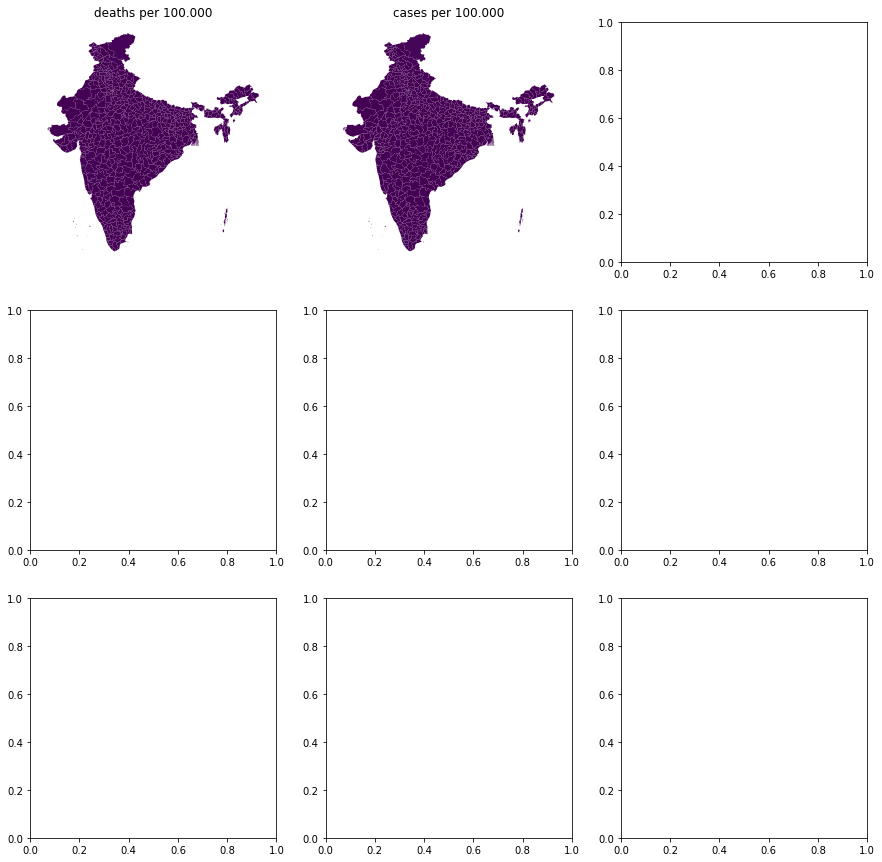

In [35]:
f, axs = plt.subplots(3,3, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 1)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [ ]:
column = ['pc11_pop_dens']

In [ ]:
f, axs = plt.subplots(2,2, figsize=(15,15))
axs = axs.flatten()

for i, col in enumerate(column):
    ax = axs[i]
    india_joined.plot(column=col, ax=ax, linewidth=0, cmap='viridis', alpha = 0.75)
    ax.set_axis_off()
    ax.set_title(col, fontsize =12)
plt.show()

In [ ]:
sns.displot(data = india_joined, x = 'pc11_pop_dens')

In [ ]:
column = india_joined["pc11_pop_dens"]
max_index = column.idxmax()
max_index

In [ ]:
india_joined.loc(axis=0)[558]['pc11_pop_dens']

In [ ]:
india_joined.loc(axis=0)[558]

In [ ]:
india_joined['pc11_pop_dens'].median()

In [ ]:
india_joined[common_columns].loc(axis=0)[558]

In [ ]:
india_s_masters.sort_values(by='censuscode', ascending=False)
